In [3]:
# import stuff
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [12]:
def g(x):
    y = x**2.+3.4*x**4.-6.6*x**3.-4.
    
    noise = np.random.normal(0, .5, size=(x.shape))
    
    y_obs = y + noise
    
    return y, y_obs

<function matplotlib.pyplot.show(close=None, block=None)>

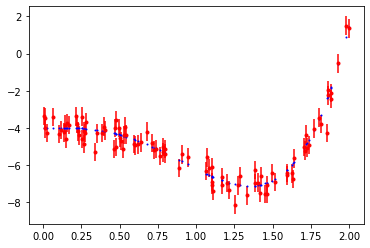

In [14]:
X = np.random.uniform(low=0.0, high=2., size=(100))
Ytruth, Yobs = g(X)
plt.errorbar(X, Yobs, yerr=0.5, fmt=".r", capsize=0)
plt.plot(X,Ytruth,'bo', markersize=1)
plt.show

In [3]:
class Two_Layer_NN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self._input_shape = [-1, 1, 1, 1]
        self._output_shape = [-1, 1, 1, 1]
        self.fc1 = tf.keras.layers.Dense(20, activation= 'sigmoid')
        self.fc2 = tf.keras.layers.Dense(1, activation= 'linear')
    
    def forward_pass(self, x):
        x = tf.reshape(x, self._input_shape)
        x = self.fc1(x)
        y_pred = self.fc2(x)
        return y_pred
            
    def loss_fun(self, X, Y):
        Y = tf.reshape(Y, self._output_shape)

        
        
        y_pred = self.forward_pass(X)
        loss = tf.reduce_mean(tf.pow(y_pred - Y,2))
        return loss, y_pred

In [13]:
DeuxLNN = Two_Layer_NN()

In [14]:
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-2)

In [8]:
# Generate a training set.
Xtr = np.random.uniform(low=0.0, high=2., size=(1000))
Ytruth, Ytr = g(Xtr)
batch_size =2

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((Xtr, Ytr))
train_dataset = train_dataset.shuffle(buffer_size=2048).batch(batch_size)

In [21]:
epochs = 10
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (X_tr, Y_tr) in enumerate(train_dataset):
    #for step in range(1000):
        

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Compute the loss value for this minibatch.
            loss_value, Y_pred = DeuxLNN.loss_fun(tf.cast(X_tr, float), tf.cast(Y_tr, float))

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, DeuxLNN.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, DeuxLNN.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))


Start of epoch 0
Training loss (for one batch) at step 0: 0.0017
Seen so far: 2 samples
Training loss (for one batch) at step 200: 0.0081
Seen so far: 402 samples
Training loss (for one batch) at step 400: 0.1196
Seen so far: 802 samples

Start of epoch 1
Training loss (for one batch) at step 0: 0.0812
Seen so far: 2 samples
Training loss (for one batch) at step 200: 0.0057
Seen so far: 402 samples
Training loss (for one batch) at step 400: 0.0062
Seen so far: 802 samples

Start of epoch 2
Training loss (for one batch) at step 0: 0.1281
Seen so far: 2 samples
Training loss (for one batch) at step 200: 0.2061
Seen so far: 402 samples
Training loss (for one batch) at step 400: 0.0462
Seen so far: 802 samples

Start of epoch 3
Training loss (for one batch) at step 0: 0.0678
Seen so far: 2 samples
Training loss (for one batch) at step 200: 0.0211
Seen so far: 402 samples
Training loss (for one batch) at step 400: 0.0286
Seen so far: 802 samples

Start of epoch 4
Training loss (for one bat

In [11]:
# Generate a test set.
Xtest = np.random.uniform(low=0.0, high=2., size=(1000))
Ytest,  Yobs = g(Xtest)

In [22]:
Y_predtest= DeuxLNN.forward_pass(Xtest)

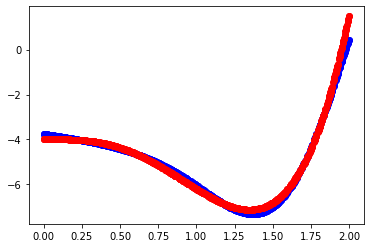

In [23]:

plt.plot(Xtest,Y_predtest.numpy().reshape(1000,), 'bo', markersize=4)
plt.plot(Xtest,Ytest, 'ro', markersize=4)
plt.show()

# Make it an approximate BNN!

In [22]:
class Two_Layer_BNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self._input_shape = [-1, 1, 1]
        self._output_shape = [-1, 1, 1]
        #you can make your network deeper since you are adding dropout
        self.fc1 = tf.keras.layers.Dense(20, activation= 'sigmoid')
        #add dropout after every weight layer
        self.do1 = tf.keras.layers.Dropout(0.1)
        self.fc2 = tf.keras.layers.Dense(20, activation= 'sigmoid')
        #add dropout after every weight layer
        self.do2 = tf.keras.layers.Dropout(0.1)
        #Change the output so you now predict mu and sigma
        self.fc3 = tf.keras.layers.Dense(2, activation= 'linear')
    
    def forward_pass(self, x):
        x = tf.reshape(x, self._input_shape)
        x = self.fc1(x)
        x = self.do1(x, training=True)
        x = self.fc2(x)
        x = self.do2(x, training=True)
        x = self.fc3(x)
        mu_pred = x[:,:,0]
        sigma_pred =x[:,:,1]
        return mu_pred, sigma_pred
            
    def loss_fun(self, X, Y):
        Y = tf.reshape(Y, self._output_shape)      
        mu_pred, sigma_pred = self.forward_pass(X)
        #change the loss to the log likelihood
        loss = tf.reduce_mean(tf.pow(mu_pred - Y,2)*tf.math.exp(-sigma_pred)+sigma_pred)
        return loss, mu_pred, sigma_pred 
    
    
        
        

In [23]:
BNN = Two_Layer_BNN()


In [35]:
optimizer2 = tf.keras.optimizers.SGD(learning_rate=1e-2)

In [ ]:
epochs = 20
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (X_tr, Y_tr) in enumerate(train_dataset):
    #for step in range(1000):
        

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Compute the loss value for this minibatch.
            loss_value, Y_pred, sig_pred = BNN.loss_fun(tf.cast(X_tr, float), tf.cast(Y_tr, float))

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, BNN.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer2.apply_gradients(zip(grads, BNN.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))


Start of epoch 0
Training loss (for one batch) at step 0: 3.8523
Seen so far: 2 samples
Training loss (for one batch) at step 200: 0.5843
Seen so far: 402 samples
Training loss (for one batch) at step 400: 0.5828
Seen so far: 802 samples

Start of epoch 1
Training loss (for one batch) at step 0: 0.9680
Seen so far: 2 samples
Training loss (for one batch) at step 200: 1.5249
Seen so far: 402 samples
Training loss (for one batch) at step 400: 0.9080
Seen so far: 802 samples

Start of epoch 2
Training loss (for one batch) at step 0: 0.7434
Seen so far: 2 samples
Training loss (for one batch) at step 200: 4.0577
Seen so far: 402 samples
Training loss (for one batch) at step 400: 1.1834
Seen so far: 802 samples

Start of epoch 3
Training loss (for one batch) at step 0: 1.2758
Seen so far: 2 samples
Training loss (for one batch) at step 200: 1.2304
Seen so far: 402 samples
Training loss (for one batch) at step 400: 0.5511
Seen so far: 802 samples

Start of epoch 4
Training loss (for one bat

In [33]:
mu_predtest, sigma_predtest = BNN.forward_pass(Xtest) #<-- the forward pass should be done multiple times, everytime appending the outputs. Here it's done just once
Ytestpred= np.random.normal(mu_predtest.numpy(), np.exp(sigma_predtest.numpy()/2) )

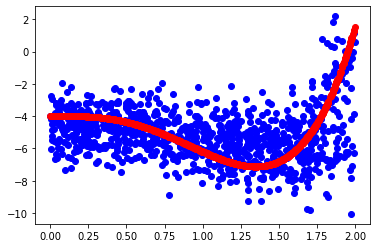

In [34]:
plt.plot(Xtest,Ytestpred.reshape(1000,), 'bo')
plt.plot(Xtest,Ytest, 'ro')
plt.show()

# Likelihood-Free Inference

You can use LFI to do the same task of learning the function g(x), assuming that we know the polynomial form of g(x) and want to learn the coefficients. Here I'm assuming the polynomial form y = x^2.+3.4*x^4.-6.6*x^3.-4. to have a few coefficients to learn. The main difference is that we don't need to evaluate the likelihood. Instead, we learn a surrogate for if by observing the mapping between the parameters of interest, theta, and the observations, through a simulator that produces noisy simulations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import torch

In [1]:
from sbi import utils as utils
import corner

In [ ]:
prior = utils.BoxUniform(low=torch.tensor(-8), high=torch.tensor(4))

In [ ]:
theta = [1., 3.4, -6.6, -4.]
x = np.random.uniform(low=0.0, high=2., size=(100))
def simulator(theta, x):

    # signal model
    a, b, c, d = theta
    
    y_model = a*torch.pow(x,2.)+b*torch.pow(x,4.)-c*torch.pow(x,3.)-d
    
    # add noise 
    y = y_model + 0.1 * torch.randn(len(x))

    return y


In [ ]:
# Plot the output of the noisy simulator
plt.errorbar(x, simulator(torch.tensor(theta)), yerr=0.1, fmt=".r", capsize=0)

Let's now use sbi to train a neural posterior estimator from these samples. The goal here will be to infer the coefficient of the polynomial. sbi will train a conditional normalizing flow to estimate the posterior of those parameters given the data. 

In [ ]:
from sbi.inference.base import infer

this_simulator = lambda theta: simulator(theta, torch.tensor(x))

posterior = infer(this_simulator, prior, method='SNPE', num_simulations=10000)

At inference time, we want to evaluate our neural posterior estimator conditioned on y, the actual observed data.

In [ ]:
sbi_samples = posterior.sample((10000,), x=torch.tensor(y))
sbi_samples = sbi_samples.detach().numpy()

In [ ]:
corner.corner(sbi_samples, labels=labels, truths=theta)

# MCMC

Alternatively, one can also write a fully Bayesian NN and learn the distribution over the weights by sampling with an MCMC algorithm. emcee is an excellent package to do that. All it requires is to define the relevant distributions and we're good to go!


In [16]:
#First define the 'physical model', which is the neural network itself, in numpy. 
#Let's make just 2 layers so the dimensionality of the space we need to sample over is not too large.

# H= ... <--- decide how wide the hidden layer needs to be.
#initialize the weight matrices and the biases.
# W_1 = np.random.randn(1,H)
# self.b_1 = np.random.randn(1,H)
# self.W_2 = np.random.randn(H,1)
# self.b_2 = np.random.randn(1,1)

NumpyNN_forward_pass(X, W_1, b_1, W_2, b_2):
        self.h = X.dot(self.W_1)+self.b_1
        self.hact = 1./(1.+np.exp(-self.h))
        y_pred = self.hact.dot(self.W_2)+self.b_2
        return y_pred

# Note that right now this is not vectorized along X (in the mini-batch direction).
# You should modify the code so it is!!

In [ ]:
DeuxLNN = Numpy_NN(10)

In [ ]:
#Define the log likelihood, the log prior, and the log posterior
import emcee

def log_likelihood(W_1, W_2, b_1, b_2, X, Yobs, yerr):
    y_model = NumpyNN_forward_pass(X, W_1, W_2, b_1, b_2)
    chi2 = (Yobs - y_model)**2 / (yerr**2)
    return np.sum(-chi2 / 2)

def log_prior(W_1, W_2, b_1, b_2):
    # This should return a zero-centered Gaussian for each weight of the network.

def log_posterior(theta, x, y, yerr):
    lp = log_prior(theta)
    if np.isfinite(lp):
        lp += log_likelihood(theta, x, y, yerr)
    return lp

In [ ]:
# create a small ball around the MLE the initialize each walker
nwalkers, ndim = 30, 2*H+2
# theta_guess = a 1D array with all the weights and biases with their initial value
pos = theta_guess + 1e-4 * np.random.randn(nwalkers, ndim)

# run emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(X, Yobs, 0.5))
sampler.run_mcmc(pos, 10000, progress=True);

In [ ]:
#Plot the resulting chains. When it is changing is called the 'burn in' phase. We are only interested
#in the part where they have become stationary. One should always inspect visually for stationarity. 

fig, axes = plt.subplots(ndim, sharex=True)
mcmc_samples = sampler.get_chain()
#labels = an array with the name of the weights of the network (maybe indexing...)
for i in range(ndim):
    ax = axes[i]
    ax.plot(mcmc_samples[:, :, i], "k", alpha=0.3, rasterized=True)
    ax.set_xlim(0, 1000)
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

We now need to thin out the chains because the sample are correlated. For that emcee has a method to compute the auto-correlation time of each parameters. We can then combine the samples across all walkers:

In [ ]:
tau = sampler.get_autocorr_time()
print("Autocorrelation time:", tau)
mcmc_samples = sampler.get_chain(discard=300, thin=np.int32(np.max(tau)/2), flat=True)
print("Remaining samples:", mcmc_samples.shape)

We can now write a function that allows us to plot the results. To marginalize over the weights we want to put the test set multiple times though the networks, every time with different weights values sampled from the posterior.